# Analyze Categories of the Data with Groupby

- Use [this CheatSheet](https://www.craft.do/s/G80r1dqrQKrjTb/b/6FC991B6-1161-4F88-A315-3E84528A1950/groupby()-Categorical-Columns-to-Sum) to work better with the following exercises.

## 1 Categorical & 1 Numerical

### Tips Dataset

In which `day` do people spend more `money` in the restaurant?

- Every row represents a table in the restaurant
- Every column represents characteristics of the tables

In [3]:
import seaborn as sns

df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [27]:
df_tips.groupby('day', observed=False).total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [28]:
df_days=df_tips.groupby('day', observed=False).total_bill.mean().reset_index()

#### Plot

In [22]:
df_days

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


In [8]:
import plotly.express as xp

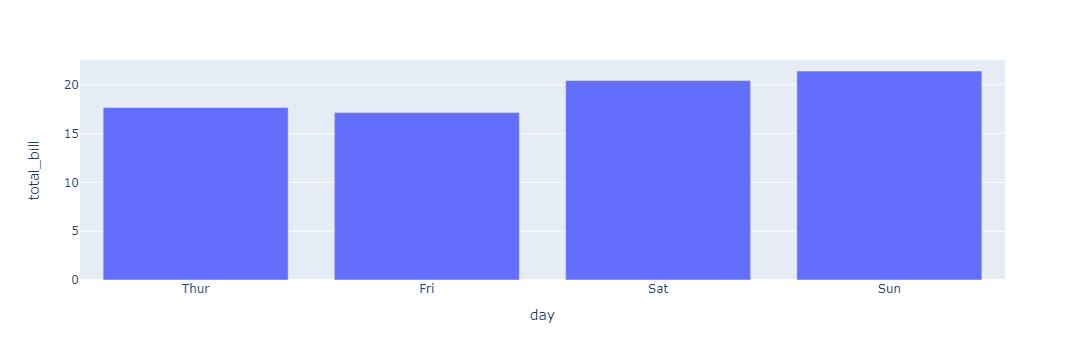

In [23]:
xp.bar(data_frame=df_days, x='day', y='total_bill')

### Titanic Dataset

Who was `older`: people who `survived`, or those who didn't?
- Every row represents a person in the titanic
- Every column represts characteristics of the people

In [4]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [29]:
df_alive=df_titanic.groupby('alive').age.mean().reset_index()
df_alive

,alive,age
0,no,30.626179
1,yes,28.343690


#### Plot

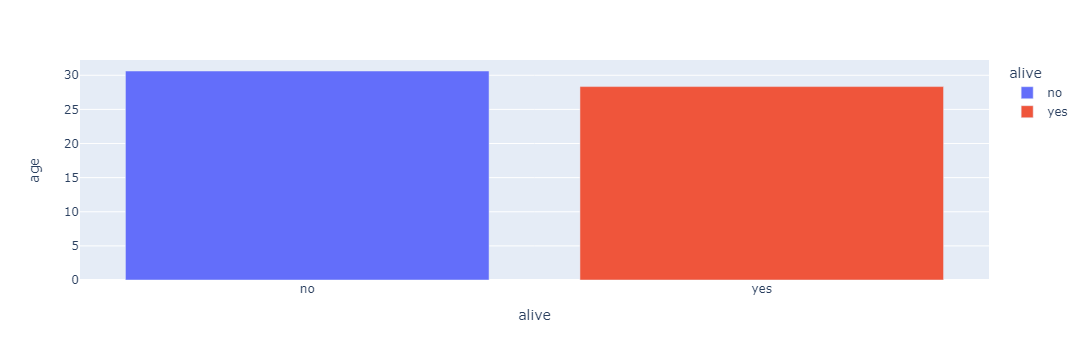

In [30]:
xp.bar(data_frame=df_alive, x='alive', y='age', color='alive')

## 2 Categorical & 1 Numerical

### Tips Dataset

When do people spend more `money` in the restaurant based on the `day` and the `time`?

In [5]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [31]:
df_money=df_tips.groupby(['day', 'time'], observed=False).total_bill.mean().reset_index()
df_money

,day,time,total_bill
0,Thur,Lunch,17.664754
1,Thur,Dinner,18.780000
2,Fri,Lunch,12.845714
3,Fri,Dinner,19.663333
4,Sat,Lunch,NaN
5,Sat,Dinner,20.441379
6,Sun,Lunch,NaN
7,Sun,Dinner,21.410000


#### Plot

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



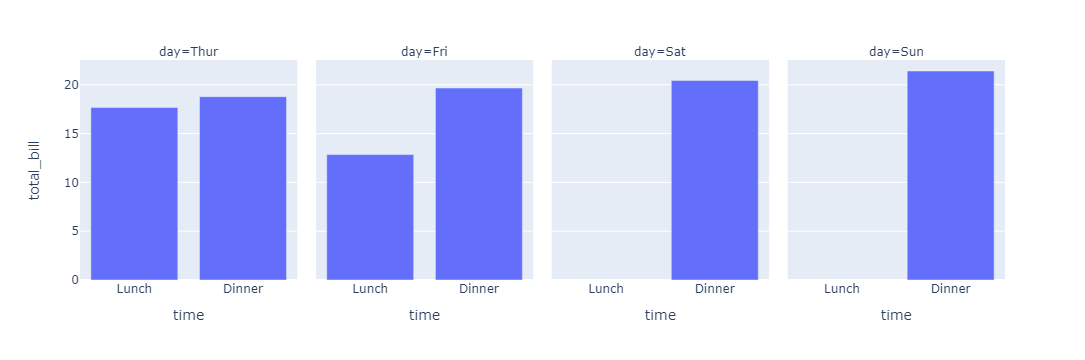

In [33]:
xp.bar(data_frame=df_money, x='time', y='total_bill', facet_col='day')

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



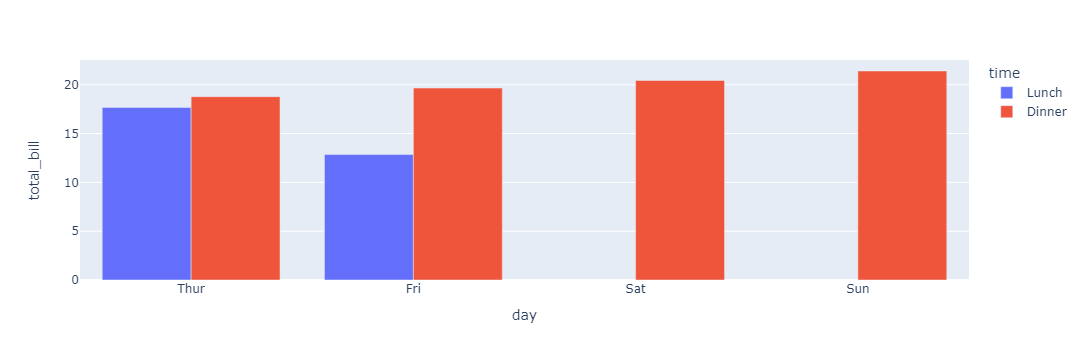

In [35]:
xp.bar(data_frame=df_money, x='day', y='total_bill',  color='time', barmode='group')

### Titanic Dataset

Were `females` who survived `older` than males who `survived`?

In [11]:
df_titanic #!

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [14]:
df_females=df_titanic.groupby(['sex', 'alive']).age.mean().reset_index()
df_females

,sex,alive,age
0,female,no,25.046875
1,female,yes,28.847716
2,male,no,31.618056
3,male,yes,27.276022


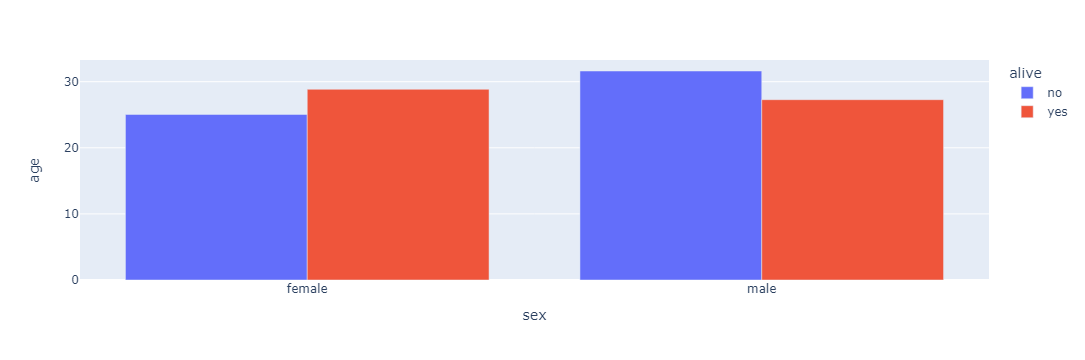

In [15]:
xp.bar(data_frame=df_females, x='sex', y='age', color='alive', barmode='group')

## 3 Categorical & 1 Numerical

### Tips Dataset

When do people give more `tip` in the restaurant based on the `day`, `time` and `sex`?

In [16]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [19]:
df_tip2=df_tips.groupby(['day', 'time', 'sex']).tip.mean().reset_index()
df_tip2

/tmp/ipykernel_508/2034369687.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,day,time,sex,tip
0,Thur,Lunch,Male,2.980333
1,Thur,Lunch,Female,2.561935
2,Thur,Dinner,Male,NaN
3,Thur,Dinner,Female,3.000000
4,Fri,Lunch,Male,1.900000
5,Fri,Lunch,Female,2.745000
6,Fri,Dinner,Male,3.032857
7,Fri,Dinner,Female,2.810000
8,Sat,Lunch,Male,NaN
9,Sat,Lunch,Female,NaN


#### Plot

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



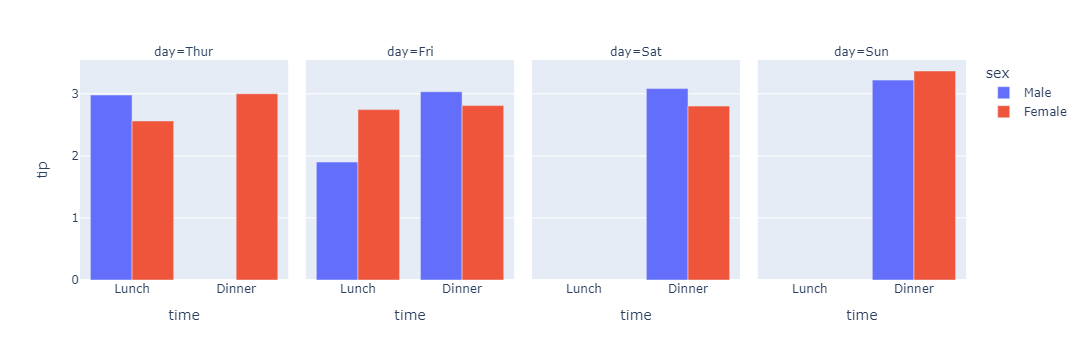

In [21]:
xp.bar(data_frame=df_tip2, x='time', y='tip', color='sex', barmode='group', facet_col='day')

### Titanic Dataset

Were `females` who survived in first `class` `older` than males who `survived`?

In [22]:
df_titanic #!

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [24]:
df_titanic2=df_titanic.groupby(['sex', 'alive', 'pclass']).age.mean().reset_index()
df_titanic2

,sex,alive,pclass,age
0,female,no,1,25.666667
1,female,no,2,36.000000
2,female,no,3,23.818182
3,female,yes,1,34.939024
4,female,yes,2,28.080882
5,female,yes,3,19.329787
6,male,no,1,44.581967
7,male,no,2,33.369048
8,male,no,3,27.255814
9,male,yes,1,36.248000


#### Plot

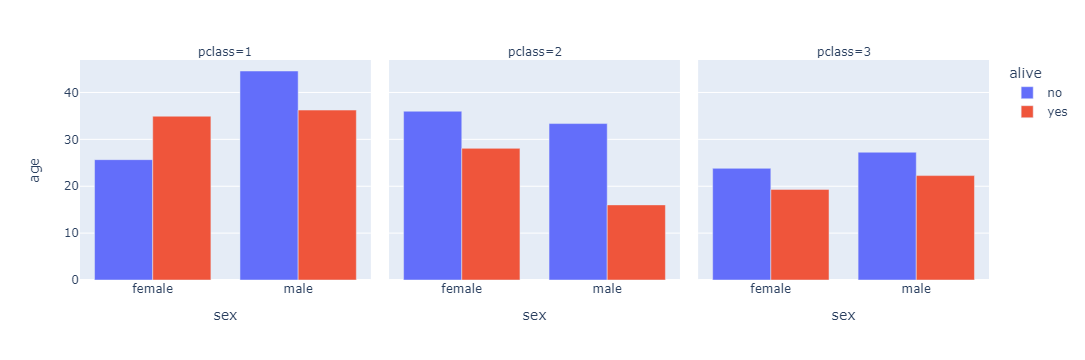

In [26]:
xp.bar(data_frame=df_titanic2, x='sex', y='age', color='alive', barmode='group', facet_col='pclass')

## 1 Categorical

This time, you need to count the `size()` based on the repetitions of each group within the column.

If you get lost, Google: "pandas dataframe count values in column"

### Tips Dataset

In which day of the week had the restaurant more tables occupied?

In [ ]:
df_tips #!

#### Data Manipulation

#### Plot

### Titanic Dataset

How many people did survive the Titanic?

In [ ]:
df_titanic

#### Data Manipulation

#### Plot